# Task 4.2 - Keyword Analysis

### Steps

0. Preliminary Steps: Construct & Import Corpus
1. Process Tokens
2. Keyword Analysis
3. Latent Topic Analysis

# Import libraries & corpus

In [1]:
import pandas as pd
import os
import pickle

In [2]:
# corpus path
corpus_path = "corpus/"

In [3]:
# corpus index file name
corpus_index_filename = "corpus index.xlsx"

In [4]:
# pickled tokens file name
pickled_tokens_filename = "doc_tokens_processed.pkl"

In [5]:
# import corpus index
corpus_index = pd.read_excel(corpus_index_filename, header=0)
corpus_index.shape

(3, 3)

In [6]:
corpus_index[0:2]

,Filename,Date,Description
0,20220720,2022.07.20,Public Officials Visit Remand Prisons to Culti...
1,20220715,2022.07.15,Kazakh National Security Committee Celebrates ...


In [7]:
# import pickled doc_tokens_processed
pickled_file = open(pickled_tokens_filename,'rb')
pickled_stuff = pickle.load(pickled_file)

# recall stuff_to_pickle = [doc_ids,doc_text,doc_tokens_processed]
doc_ids = pickled_stuff[0]
doc_text = pickled_stuff[1]
doc_tokens_processed = pickled_stuff[2]

In [8]:
doc_ids

['20220411', '20220715', '20220720']

In [9]:
doc_text[0]

'US Ready to Partner With Kazakh Government on Implementation of Political Reforms, Senior Diplomat Says on Visit to KazakhstanThe United States supports President Tokayev’s political reforms agenda, said Uzra Zeya, Under-Secretary for Civilian Security, Democracy, and Human Rights, at the press meeting at the Kazakh Ministry of Foreign Affairs on April 11.Uzra Zeya meeting with Minister of Foreign Affairs – Mukhtar Tileuberdi. Photo credit: gov.kzDuring her visit to Kazakhstan, the sides discussed a wide range of issues, including the aftermath of the January unrest, combating human trafficking, empowerment of women, the rights of people with disabilities, and cooperation in security, law enforcement and anti-corruption.Zeya said that the U.S. government welcomed  President Kassym-Jomart Tokayev’s political reforms that he announced during his address to the nation on March 16, including those designed to strengthen the legislative branch of authority and political parties, and enhanc

In [10]:
len(doc_tokens_processed[0])

245

In [15]:
doc_tokens_processed[0][0:10]

['ready',
 'partner',
 'kazakh',
 'government',
 'implementation',
 'political',
 'reform',
 'senior',
 'diplomat',
 'say']

In [20]:
tokens = []

for doc_tokens in doc_tokens_processed:
    tokens += doc_tokens

len(tokens)

828

# 2. Keyword Analysis

reference: http://damir.cavar.me/pynotebooks/Python_NLTK_Texts_and_Frequencies.html

In [21]:
# pip install nltk

In [22]:
import nltk
from nltk import FreqDist

In [23]:
# generate the frequency distribution of the tokens
freqdist = nltk.FreqDist(tokens)
len(freqdist)

512

In [24]:
freqdist

FreqDist({'nsc': 13, 'kazakhstan': 12, 'operation': 11, 'anti-corruption': 10, 'kazakh': 9, 'drug': 9, 'wa': 9, 'state': 8, 'said': 7, 'reform': 6, ...})

In [25]:
for x in freqdist:
    print(x, freqdist[x])

nsc 13
kazakhstan 12
operation 11
anti-corruption 10
kazakh 9
drug 9
wa 9
state 8
said 7
reform 6
security 6
two 6
group 6
partner 5
government 5
political 5
united 5
human 5
photo 5
credit 5
including 5
council 5
committee 5
first 5
hostage 5
public 5
visit 4
tokayev 4
zeya 4
right 4
u.s. 4
full 4
prison 4
also 4
country 4
national 4
year 4
july 4
terrorist 4
criminal 4
completed 4
agent 4
ready 3
implementation 3
president 3
press 3
meeting 3
issue 3
january 3
woman 3
people 3
cooperation 3
authority 3
impact 3
sanction 3
according 3
many 3
work 3
regional 3
2019 3
jusan 3
back 3
service 3
kilogram 3
policy 3
concept 3
corruption 3
senior 2
civilian 2
ministry 2
foreign 2
affair 2
unrest 2
kassym-jomart 2
designed 2
promote 2
look 2
forward 2
progress 2
development 2
added 2
addressing 2
russia 2
economy 2
minimize 2
ha 2
taken 2
response 2
part 2
one 2
result 2
second 2
30 2
highlighting 2
high-profile 2
mark 2
30th 2
anniversary 2
personnel 2
detained 2
stage 2
agency 2
police 2
ne

In [26]:
freqdist_tuples = [(x,freqdist[x]) for x in freqdist]
len(freqdist_tuples)

512

In [27]:
freqdist_tuples

[('nsc', 13),
 ('kazakhstan', 12),
 ('operation', 11),
 ('anti-corruption', 10),
 ('kazakh', 9),
 ('drug', 9),
 ('wa', 9),
 ('state', 8),
 ('said', 7),
 ('reform', 6),
 ('security', 6),
 ('two', 6),
 ('group', 6),
 ('partner', 5),
 ('government', 5),
 ('political', 5),
 ('united', 5),
 ('human', 5),
 ('photo', 5),
 ('credit', 5),
 ('including', 5),
 ('council', 5),
 ('committee', 5),
 ('first', 5),
 ('hostage', 5),
 ('public', 5),
 ('visit', 4),
 ('tokayev', 4),
 ('zeya', 4),
 ('right', 4),
 ('u.s.', 4),
 ('full', 4),
 ('prison', 4),
 ('also', 4),
 ('country', 4),
 ('national', 4),
 ('year', 4),
 ('july', 4),
 ('terrorist', 4),
 ('criminal', 4),
 ('completed', 4),
 ('agent', 4),
 ('ready', 3),
 ('implementation', 3),
 ('president', 3),
 ('press', 3),
 ('meeting', 3),
 ('issue', 3),
 ('january', 3),
 ('woman', 3),
 ('people', 3),
 ('cooperation', 3),
 ('authority', 3),
 ('impact', 3),
 ('sanction', 3),
 ('according', 3),
 ('many', 3),
 ('work', 3),
 ('regional', 3),
 ('2019', 3),
 ('jus

In [28]:
# sort tuples by token frequency
freqdist_tuples.sort(key = lambda x: (-x[1],x[0]),reverse=False)

In [29]:
freqdist_tuples

[('nsc', 13),
 ('kazakhstan', 12),
 ('operation', 11),
 ('anti-corruption', 10),
 ('drug', 9),
 ('kazakh', 9),
 ('wa', 9),
 ('state', 8),
 ('said', 7),
 ('group', 6),
 ('reform', 6),
 ('security', 6),
 ('two', 6),
 ('committee', 5),
 ('council', 5),
 ('credit', 5),
 ('first', 5),
 ('government', 5),
 ('hostage', 5),
 ('human', 5),
 ('including', 5),
 ('partner', 5),
 ('photo', 5),
 ('political', 5),
 ('public', 5),
 ('united', 5),
 ('agent', 4),
 ('also', 4),
 ('completed', 4),
 ('country', 4),
 ('criminal', 4),
 ('full', 4),
 ('july', 4),
 ('national', 4),
 ('prison', 4),
 ('right', 4),
 ('terrorist', 4),
 ('tokayev', 4),
 ('u.s.', 4),
 ('visit', 4),
 ('year', 4),
 ('zeya', 4),
 ('2019', 3),
 ('according', 3),
 ('authority', 3),
 ('back', 3),
 ('concept', 3),
 ('cooperation', 3),
 ('corruption', 3),
 ('impact', 3),
 ('implementation', 3),
 ('issue', 3),
 ('january', 3),
 ('jusan', 3),
 ('kilogram', 3),
 ('many', 3),
 ('meeting', 3),
 ('people', 3),
 ('policy', 3),
 ('president', 3),
 

# Visualize Top 25 Keywords in a Barplot

In [30]:
top25 = freqdist_tuples[0:25]
top25

[('nsc', 13),
 ('kazakhstan', 12),
 ('operation', 11),
 ('anti-corruption', 10),
 ('drug', 9),
 ('kazakh', 9),
 ('wa', 9),
 ('state', 8),
 ('said', 7),
 ('group', 6),
 ('reform', 6),
 ('security', 6),
 ('two', 6),
 ('committee', 5),
 ('council', 5),
 ('credit', 5),
 ('first', 5),
 ('government', 5),
 ('hostage', 5),
 ('human', 5),
 ('including', 5),
 ('partner', 5),
 ('photo', 5),
 ('political', 5),
 ('public', 5)]

In [31]:
top25_tokens = [x[0] for x in top25]
top25_counts = [x[1] for x in top25]

In [32]:
top25_tokens

['nsc',
 'kazakhstan',
 'operation',
 'anti-corruption',
 'drug',
 'kazakh',
 'wa',
 'state',
 'said',
 'group',
 'reform',
 'security',
 'two',
 'committee',
 'council',
 'credit',
 'first',
 'government',
 'hostage',
 'human',
 'including',
 'partner',
 'photo',
 'political',
 'public']

In [33]:
top25_counts

[13, 12, 11, 10, 9, 9, 9, 8, 7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

In [34]:
# pip install numpy

In [35]:
# pip install matplotlib

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
fig = plt.figure(figsize = (10, 5))

<Figure size 1000x500 with 0 Axes>

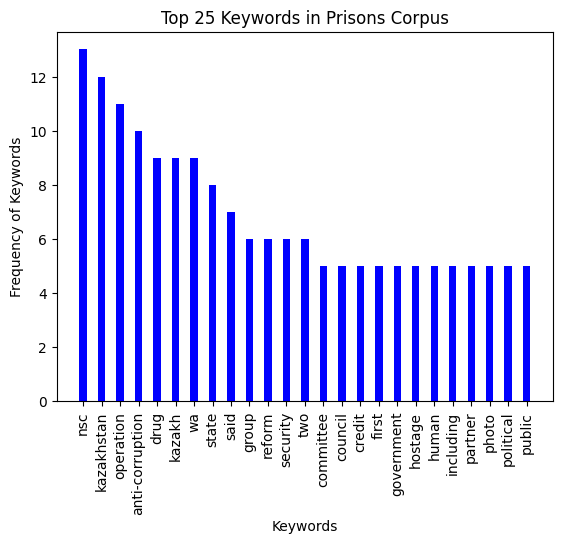

In [119]:
# creating the bar plot
plt.bar(top25_tokens, top25_counts, color ='blue', width = 0.4)
 
plt.xlabel("Keywords")
plt.xticks(rotation=90)
plt.ylabel("Frequency of Keywords")
plt.title("Top 25 Keywords in Prisons Corpus")

# save the plot before showing
plt.savefig("results/top25_py.png",dpi=400)

plt.show()

In [123]:
v1 = pd.DataFrame({"keywords": top25_tokens,
                 "counts": top25_counts})

In [124]:
v1

,keywords,counts
0,nsc,13
1,kazakhstan,12
2,operation,11
3,anti-corruption,10
4,drug,9
5,kazakh,9
6,wa,9
7,state,8
8,said,7
9,group,6


In [161]:
v1.to_excel("results/v1.xlsx",index=False)

# Compare Frequencies of Top Tokens over Two Periods

In [54]:
corpus_index

,Filename,Date,Description
0,20220720,2022.07.20,Public Officials Visit Remand Prisons to Culti...
1,20220715,2022.07.15,Kazakh National Security Committee Celebrates ...
2,20220411,2022.04.11,US Ready to Partner With Kazakh Government on ...


In [56]:
doc_ids

['20220411', '20220715', '20220720']

In [60]:
period_break = "20220700"

In [61]:
period1_ids = [idx for idx in doc_ids if idx < period_break]
period1_ids

['20220411']

In [63]:
period2_ids = [idx for idx in doc_ids if idx >= period_break]
period2_ids

['20220715', '20220720']

In [67]:
# token list for period 1

period1_tokens = []

for ids in period1_ids:
    period1_tokens += doc_tokens_processed[doc_ids.index(ids)]
    
len(period1_tokens)

245

In [68]:
# token list for period 2

period2_tokens = []

for ids in period2_ids:
    period2_tokens += doc_tokens_processed[doc_ids.index(ids)]
    
len(period2_tokens)

583

In [70]:
len(period1_tokens) + len(period2_tokens)

828

In [71]:
len(tokens)

828

In [73]:
# define fxn to generate the frequency distribution of a doc

def tokenfreqdist(tokens):

    freqdist = nltk.FreqDist(tokens)
    freqdist_tuples = [(x,freqdist[x]) for x in freqdist]
    freqdist_tuples.sort(key = lambda x: (-x[1],x[0]),reverse=False)
    return(freqdist_tuples)

In [90]:
freqdist_tuples1 = tokenfreqdist(period1_tokens)
freqdist_tuples1

[('kazakhstan', 7),
 ('government', 5),
 ('human', 5),
 ('partner', 5),
 ('political', 5),
 ('reform', 5),
 ('said', 5),
 ('right', 4),
 ('state', 4),
 ('u.s.', 4),
 ('united', 4),
 ('zeya', 4),
 ('full', 3),
 ('impact', 3),
 ('implementation', 3),
 ('including', 3),
 ('kazakh', 3),
 ('ready', 3),
 ('sanction', 3),
 ('added', 2),
 ('affair', 2),
 ('also', 2),
 ('authority', 2),
 ('council', 2),
 ('designed', 2),
 ('economy', 2),
 ('foreign', 2),
 ('forward', 2),
 ('issue', 2),
 ('january', 2),
 ('look', 2),
 ('meeting', 2),
 ('minimize', 2),
 ('president', 2),
 ('promote', 2),
 ('response', 2),
 ('security', 2),
 ('tokayev', 2),
 ('unrest', 2),
 ('visit', 2),
 ('11.uzra', 1),
 ('16', 1),
 ('according', 1),
 ('accountability', 1),
 ('added.regarding', 1),
 ('adding', 1),
 ('address', 1),
 ('addressing', 1),
 ('advance', 1),
 ('advancement', 1),
 ('aftermath', 1),
 ('agenda', 1),
 ('allegation', 1),
 ('ally', 1),
 ('announced', 1),
 ('anti-corruption.zeya', 1),
 ('april', 1),
 ('branch',

In [91]:
freqdist_tuples2 = tokenfreqdist(period2_tokens)
freqdist_tuples2

[('nsc', 13),
 ('operation', 11),
 ('anti-corruption', 10),
 ('drug', 9),
 ('wa', 9),
 ('group', 6),
 ('kazakh', 6),
 ('two', 6),
 ('committee', 5),
 ('first', 5),
 ('hostage', 5),
 ('kazakhstan', 5),
 ('public', 5),
 ('agent', 4),
 ('completed', 4),
 ('credit', 4),
 ('criminal', 4),
 ('july', 4),
 ('national', 4),
 ('photo', 4),
 ('security', 4),
 ('state', 4),
 ('terrorist', 4),
 ('year', 4),
 ('2019', 3),
 ('back', 3),
 ('concept', 3),
 ('corruption', 3),
 ('council', 3),
 ('country', 3),
 ('jusan', 3),
 ('kilogram', 3),
 ('policy', 3),
 ('prison', 3),
 ('regional', 3),
 ('service', 3),
 ('work', 3),
 ('12', 2),
 ('2022–2026', 2),
 ('30', 2),
 ('30th', 2),
 ('according', 2),
 ('adopted', 2),
 ('agency', 2),
 ('aktau', 2),
 ('also', 2),
 ('anniversary', 2),
 ('brazil', 2),
 ('child', 2),
 ('commission', 2),
 ('conflict', 2),
 ('cooperation', 2),
 ('dealer', 2),
 ('delivery', 2),
 ('department', 2),
 ('detained', 2),
 ('february', 2),
 ('fight', 2),
 ('gang', 2),
 ('greco', 2),
 ('hig

In [92]:
top25_tokens

['nsc',
 'kazakhstan',
 'operation',
 'anti-corruption',
 'drug',
 'kazakh',
 'wa',
 'state',
 'said',
 'group',
 'reform',
 'security',
 'two',
 'committee',
 'council',
 'credit',
 'first',
 'government',
 'hostage',
 'human',
 'including',
 'partner',
 'photo',
 'political',
 'public']

In [93]:
top25_counts1 = [0]*25
top25_counts2 = [0]*25

In [94]:
top25_counts1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [95]:
freqdist_tuples1

[('kazakhstan', 7),
 ('government', 5),
 ('human', 5),
 ('partner', 5),
 ('political', 5),
 ('reform', 5),
 ('said', 5),
 ('right', 4),
 ('state', 4),
 ('u.s.', 4),
 ('united', 4),
 ('zeya', 4),
 ('full', 3),
 ('impact', 3),
 ('implementation', 3),
 ('including', 3),
 ('kazakh', 3),
 ('ready', 3),
 ('sanction', 3),
 ('added', 2),
 ('affair', 2),
 ('also', 2),
 ('authority', 2),
 ('council', 2),
 ('designed', 2),
 ('economy', 2),
 ('foreign', 2),
 ('forward', 2),
 ('issue', 2),
 ('january', 2),
 ('look', 2),
 ('meeting', 2),
 ('minimize', 2),
 ('president', 2),
 ('promote', 2),
 ('response', 2),
 ('security', 2),
 ('tokayev', 2),
 ('unrest', 2),
 ('visit', 2),
 ('11.uzra', 1),
 ('16', 1),
 ('according', 1),
 ('accountability', 1),
 ('added.regarding', 1),
 ('adding', 1),
 ('address', 1),
 ('addressing', 1),
 ('advance', 1),
 ('advancement', 1),
 ('aftermath', 1),
 ('agenda', 1),
 ('allegation', 1),
 ('ally', 1),
 ('announced', 1),
 ('anti-corruption.zeya', 1),
 ('april', 1),
 ('branch',

In [99]:
for top_token in top25_tokens:
    tuples = freqdist_tuples1.copy()
    while(tuples):
        tup = tuples.pop()
        if top_token == tup[0]:
            print(tup)
            top25_counts1[top25_tokens.index(top_token)] = tup[1]
            break

('kazakhstan', 7)
('kazakh', 3)
('state', 4)
('said', 5)
('reform', 5)
('security', 2)
('council', 2)
('credit', 1)
('government', 5)
('human', 5)
('including', 3)
('partner', 5)
('photo', 1)
('political', 5)


In [100]:
top25_counts1

[0, 7, 0, 0, 0, 3, 0, 4, 5, 0, 5, 2, 0, 0, 2, 1, 0, 5, 0, 5, 3, 5, 1, 5, 0]

In [101]:
for top_token in top25_tokens:
    tuples = freqdist_tuples2.copy()
    while(tuples):
        tup = tuples.pop()
        if top_token == tup[0]:
            print(tup)
            top25_counts2[top25_tokens.index(top_token)] = tup[1]
            break

('nsc', 13)
('kazakhstan', 5)
('operation', 11)
('anti-corruption', 10)
('drug', 9)
('kazakh', 6)
('wa', 9)
('state', 4)
('said', 2)
('group', 6)
('reform', 1)
('security', 4)
('two', 6)
('committee', 5)
('council', 3)
('credit', 4)
('first', 5)
('hostage', 5)
('including', 2)
('photo', 4)
('public', 5)


In [102]:
top25_counts2

[13, 5, 11, 10, 9, 6, 9, 4, 2, 6, 1, 4, 6, 5, 3, 4, 5, 0, 5, 0, 2, 0, 4, 0, 5]

In [153]:
v2 = pd.DataFrame({"Rank":range(1,26),
                   "Keyword": top25_tokens,
                 "Period 1": top25_counts1,
                  "Period 2": top25_counts2})

In [154]:
v2

,Rank,Keyword,Period 1,Period 2
0,1,nsc,0,13
1,2,kazakhstan,7,5
2,3,operation,0,11
3,4,anti-corruption,0,10
4,5,drug,0,9
5,6,kazakh,3,6
6,7,wa,0,9
7,8,state,4,4
8,9,said,5,2
9,10,group,0,6


In [155]:
v2_melted = pd.melt(v2,id_vars=["Rank","Keyword"],var_name="Period",value_name="Frequency").sort_values(["Rank","Period"])

In [156]:
v2_melted

,Rank,Keyword,Period,Frequency
0,1,nsc,Period 1,0
25,1,nsc,Period 2,13
1,2,kazakhstan,Period 1,7
26,2,kazakhstan,Period 2,5
2,3,operation,Period 1,0
27,3,operation,Period 2,11
3,4,anti-corruption,Period 1,0
28,4,anti-corruption,Period 2,10
4,5,drug,Period 1,0
29,5,drug,Period 2,9


In [160]:
v2_melted.to_excel("results/v2_melted.xlsx",index=False)

# Step 4. Word Cloud of Top 25 tokens for two documents

Python's wordcloud - https://www.datacamp.com/tutorial/wordcloud-python (requires Microsoft C++ Virtual)

Web-based app - https://www.wordclouds.com/

In [23]:
# pip install wordcloud

In [24]:
# from PIL import Image
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [120]:
import pandas as pd

In [26]:
# weight: top25_counts

In [27]:
# word: top25_tokens

In [28]:
# create color column

HEX color codes - https://htmlcolorcodes.com/

In [121]:
# choose colors for the word cloud
red = "#FF0000"    # doc1 only
blue = "#0000FF"   # doc2 only
purple = "#800080" # overlap

In [122]:
# list of color hex codes. make sure it contains exacly 25 items 
top25_colors_1 = [red] * len(top25_tokens1_only)
top25_colors_2 = [blue] * len(top25_tokens2_only)
top25_colors_overlap = [purple] * len(overlap)

In [123]:
# list of 25 url's
# if you insert urls here, they will appear as hyperlinks in the wordcloud
# ours will be null

top25_url_1 = [""] * len(top25_tokens1_only)
top25_url_2 = [""] * len(top25_tokens2_only)
top25_url_overlap = [""] * len(overlap)

In [124]:
dat1 = pd.DataFrame({"weight":top25_counts1_only,"word":top25_tokens1_only,"color":top25_colors_1,"url":top25_url_1})

In [125]:
dat2 = pd.DataFrame({"weight":top25_counts2_only,"word":top25_tokens2_only,"color":top25_colors_2,"url":top25_url_2})

In [126]:
dat_overlap = pd.DataFrame({"weight":overlap_counts,"word":overlap_tokens,"color":top25_colors_overlap,"url":top25_url_overlap})

In [130]:
dat = pd.concat([dat1,dat2,dat_overlap])

In [133]:
dat.dtypes

weight     int64
word      object
color     object
url       object
dtype: object

In [134]:
dat

,weight,word,color,url
0,107,hamlet,#FF0000,
1,95,hor,#FF0000,
2,81,oh,#FF0000,
3,71,know,#FF0000,
4,71,well,#FF0000,
5,70,father,#FF0000,
6,69,ti,#FF0000,
7,68,selfe,#FF0000,
8,66,loue,#FF0000,
9,65,may,#FF0000,


In [135]:
dat.to_csv("../results/task4_wordcloud_data.csv",index=False)

https://www.wordclouds.com/

# Step 5. Top 25 barplots highlighting overlapping tokens

In [136]:
dat1_all = pd.concat([dat1,dat_overlap])

In [149]:
# correct overlap counts for second document
overlap2 = [x for x in top25_2 if x[0] in top25_tokens1]
overlap_counts2 = [x[1] for x in overlap2]
overlap_tokens2,overlap_counts2

(['haue',
  'thou',
  'enter',
  'shall',
  'come',
  'king',
  'thy',
  'would',
  'good',
  'lord',
  'make',
  'like',
  'let'],
 [122, 90, 81, 68, 67, 66, 56, 53, 49, 46, 45, 43, 42])

In [150]:
overlap_tokens,overlap_counts

(['lord',
  'king',
  'haue',
  'come',
  'let',
  'shall',
  'thou',
  'good',
  'thy',
  'enter',
  'like',
  'would',
  'make'],
 [216, 180, 178, 127, 107, 107, 107, 98, 90, 85, 83, 73, 70])

In [151]:
dat_overlap2 = pd.DataFrame({"weight":overlap_counts2,"word":overlap_tokens,"color":top25_colors_overlap,"url":top25_url_overlap})

In [152]:
dat2_all = pd.concat([dat2,dat_overlap2])

In [153]:
dat2_all

,weight,word,color,url
0,137,macb,#0000FF,
1,66,macbeth,#0000FF,
2,62,vpon,#0000FF,
3,61,thee,#0000FF,
4,58,macd,#0000FF,
5,57,yet,#0000FF,
6,52,hath,#0000FF,
7,50,time,#0000FF,
8,49,rosse,#0000FF,
9,48,lady,#0000FF,


In [154]:
dat1_all.sort_values(["weight"],ascending=False,inplace=True)
dat1_all.reset_index(drop=True,inplace=True)

In [155]:
dat2_all.sort_values(["weight"],ascending=False,inplace=True)
dat2_all.reset_index(drop=True,inplace=True)

In [157]:
dat1_all

,weight,word,color,url
0,216,lord,#800080,
1,180,king,#800080,
2,178,haue,#800080,
3,127,come,#800080,
4,107,thou,#800080,
5,107,shall,#800080,
6,107,let,#800080,
7,107,hamlet,#FF0000,
8,98,good,#800080,
9,95,hor,#FF0000,


In [158]:
dat2_all

,weight,word,color,url
0,137,macb,#0000FF,
1,122,lord,#800080,
2,90,king,#800080,
3,81,haue,#800080,
4,68,come,#800080,
5,67,let,#800080,
6,66,macbeth,#0000FF,
7,66,shall,#800080,
8,62,vpon,#0000FF,
9,61,thee,#0000FF,


In [159]:
import numpy as np
import matplotlib.pyplot as plt

In [160]:
fig = plt.figure(figsize = (10, 5))

<Figure size 1000x500 with 0 Axes>

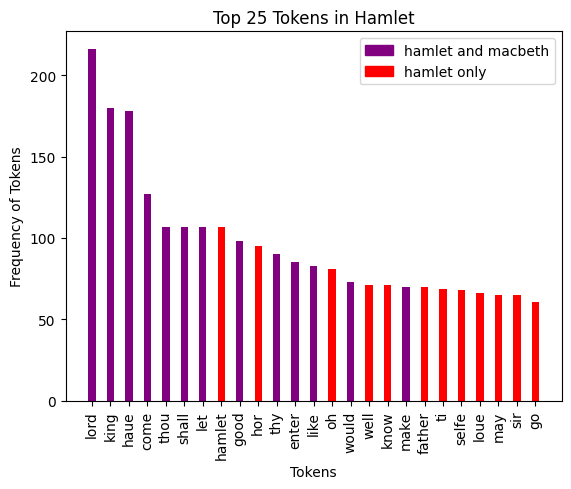

In [162]:
# bar plot for doc1
bar_dat = dat1_all
bar_name = doc1name
bar_color = "red"

plt.bar(bar_dat["word"], bar_dat["weight"], color = bar_dat["color"], width = 0.4)
 
plt.xlabel("Tokens")
plt.xticks(rotation=90)
plt.ylabel("Frequency of Tokens")
plt.title("Top 25 Tokens in "+bar_name.capitalize())

colors = {doc1name+" and "+doc2name:'purple',bar_name+" only":bar_color}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

# save the plot before showing
plt.savefig("../results/task4_top25_barplot_"+bar_name+".png",dpi=400)

plt.show()

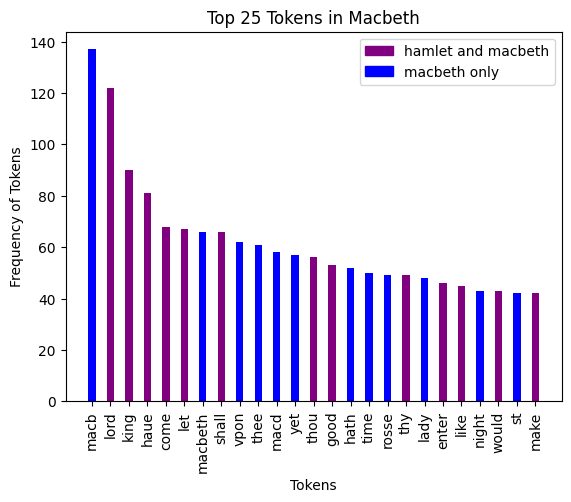

In [163]:
# bar plot for doc2
bar_dat = dat2_all
bar_name = doc2name
bar_color = "blue"

plt.bar(bar_dat["word"], bar_dat["weight"], color = bar_dat["color"], width = 0.4)
 
plt.xlabel("Tokens")
plt.xticks(rotation=90)
plt.ylabel("Frequency of Tokens")
plt.title("Top 25 Tokens in "+bar_name.capitalize())

colors = {doc1name+" and "+doc2name:'purple',bar_name+" only":bar_color}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

# save the plot before showing
plt.savefig("../results/task4_top25_barplot_"+bar_name+".png",dpi=400)

plt.show()

# Bonus: Visual Top Keywords in a Word Cloud

Python's wordcloud - https://www.datacamp.com/tutorial/wordcloud-python (requires Microsoft C++ Virtual)

Web-based app - https://www.wordclouds.com/

In [40]:
# pip install wordcloud

In [41]:
# from PIL import Image
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [42]:
import pandas as pd

In [43]:
# weight: top25_counts

In [44]:
# word: top25_tokens

In [45]:
# create color column

HEX color codes - https://htmlcolorcodes.com/

In [46]:
# choose some colors for the word cloud
purple = "#7D3C98".lower()
gold = "#F4D03F".lower()

In [47]:
# list of color hex codes. make sure it contains exacly 25 items 
top25_colors = [purple,gold] * 12 + [purple]
top25_colors

['#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98']

In [48]:
# list of 25 url's
# if you insert urls here, they will appear as hyperlinks in the wordcloud
# ours will be null

top25_url = [""] * 25
top25_url

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [49]:
dat = pd.DataFrame({"weight":top25_counts,"word":top25_tokens,"color":top25_colors,"url":top25_url})

In [50]:
dat

,weight,word,color,url
0,13,nsc,#7d3c98,
1,12,kazakhstan,#f4d03f,
2,11,operation,#7d3c98,
3,10,anti-corruption,#f4d03f,
4,9,drug,#7d3c98,
5,9,kazakh,#f4d03f,
6,9,wa,#7d3c98,
7,8,state,#f4d03f,
8,7,said,#7d3c98,
9,6,group,#f4d03f,


In [51]:
dat.dtypes

weight     int64
word      object
color     object
url       object
dtype: object

In [52]:
dat.to_csv("results/task3_wordcloud_data.csv",index=False)

https://www.wordclouds.com/